# FYP OSNR: DATA VISUALISATION

Imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

## MATCHING SHAPES

Since the signals are all taken over time, the channels we want to look at can be taken at different points in time depending on the measurement. However, the general shape should be the same (except for when we start turning off channels). The following function `get_match` takes the times, signal, and on-signal, and compares the signal to the on-signal. It then shifts the signal by one timestep until its passed over every timestep and takes the most accurate match. The `get_match_window` function does the same but matches an entire function to just a window of another signal:

In [2]:
def get_match(t, signal, signal_on):
    # set sum of squared errors to infinity
    sse = np.inf
    # initialise the signal we return as our current signal
    new_signal = signal.copy()
    
    # loop through each element
    for i in range(len(t)):
        # roll the array so that i values at end are moved to start
        test_signal = np.roll(signal, i)
        # get the sse of this test signal compared to the on signal
        test_sse = sum(np.abs(test_signal - signal_on)**2)
        # if the new sse is smaller than previous
        if test_sse < sse:
            # set new sse
            sse = test_sse
            # set new signal
            new_signal = test_signal
    
    return new_signal

def get_match_window(t, signal, signal_window):
    # set sum of squared errors to infinity
    sse = np.inf
    # initialise the signal we return as our current signal
    new_signal = signal.copy()
    
    # loop through each element
    for i in range(len(t)):
        # roll the array so that i values at end are moved to start
        # then only look at the same number of values as the signal window
        # this means that we are directly the window to the signal
        test_signal = np.roll(signal, i)[:len(signal_window)]
        # get the sse of this test signal compared to the window signal
        test_sse = sum(np.abs(test_signal - signal_window)**2)
        # if the new sse is smaller than previous
        if test_sse < sse:
            # set new sse
            sse = test_sse
            # set new signal
            # ignoring windowing
            new_signal = np.roll(signal, i)
    
    return new_signal

The on-signal we want to use for comparison is as follows. We also define the window we wish to look at, roughly in the range of the markers (channel 81 to 87):

Text(0.5, 0, 'Time (s)')

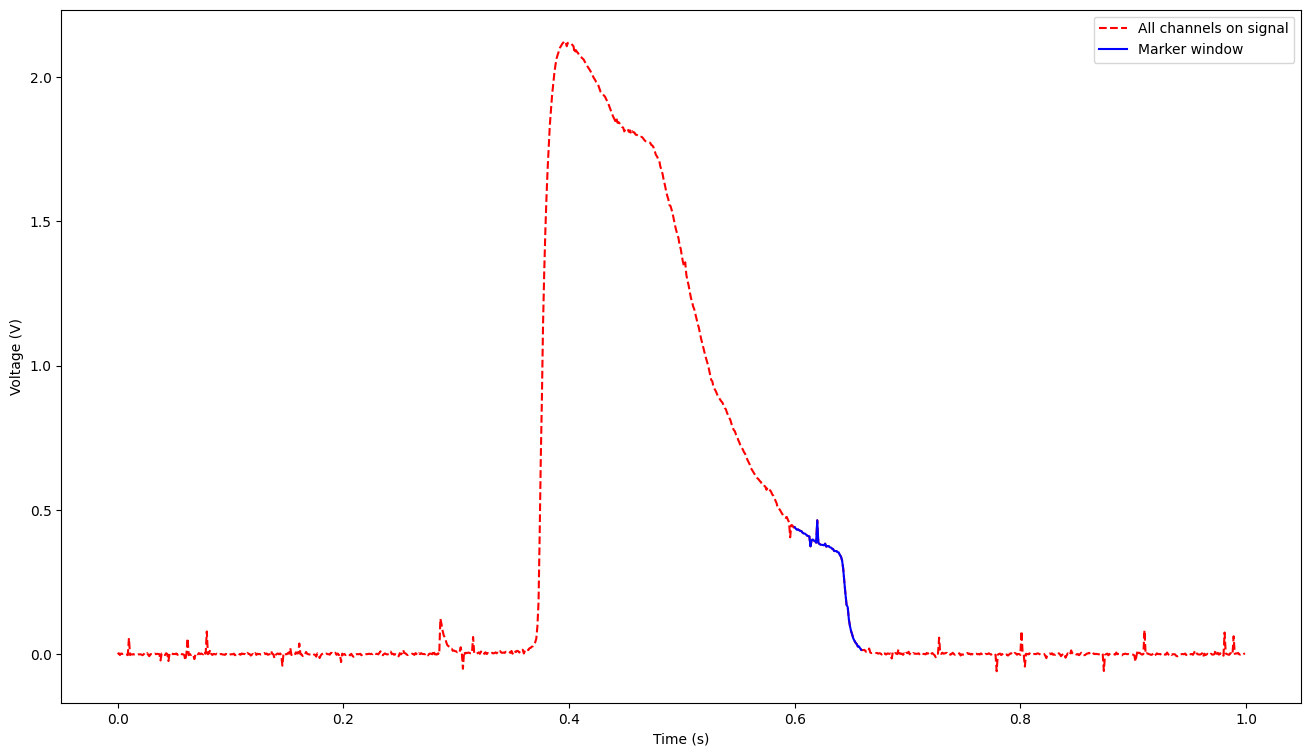

In [3]:
# import the on data from the text file
t_on, signal_on = np.loadtxt(f'Data/on_channels/reading_000.txt', delimiter=',', skiprows=1).T
# fix data by only taking first second of it (as it is periodic with 1s), total data is 2s long so half it
t_on = t_on[:len(t_on)//2]
signal_on = signal_on[:len(signal_on)//2]

# the markers to use
marker_81 = 600
marker_87 = 660
# create an array of only this window of the on signal
marker_window = signal_on[marker_81:marker_87]

# PLOTTING
fig, ax = plt.subplots(
    1, 1,
    figsize=(16, 9)
)

# Plot the fixed signal with the on signal
ax.plot(t_on, signal_on, label=f'All channels on signal', color='r', ls='--', zorder=0)
ax.plot(t_on[marker_81:marker_87], marker_window, label=f'Marker window', color='b', zorder=1)
ax.legend()

ax.set_ylabel('Voltage (V)')
ax.set_xlabel('Time (s)')

We can then pass through many readings and get this fixed signal, plotting it with the on-signal:

C:\Users\seani\AppData\Local\Temp\ipykernel_3056\2338778231.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(


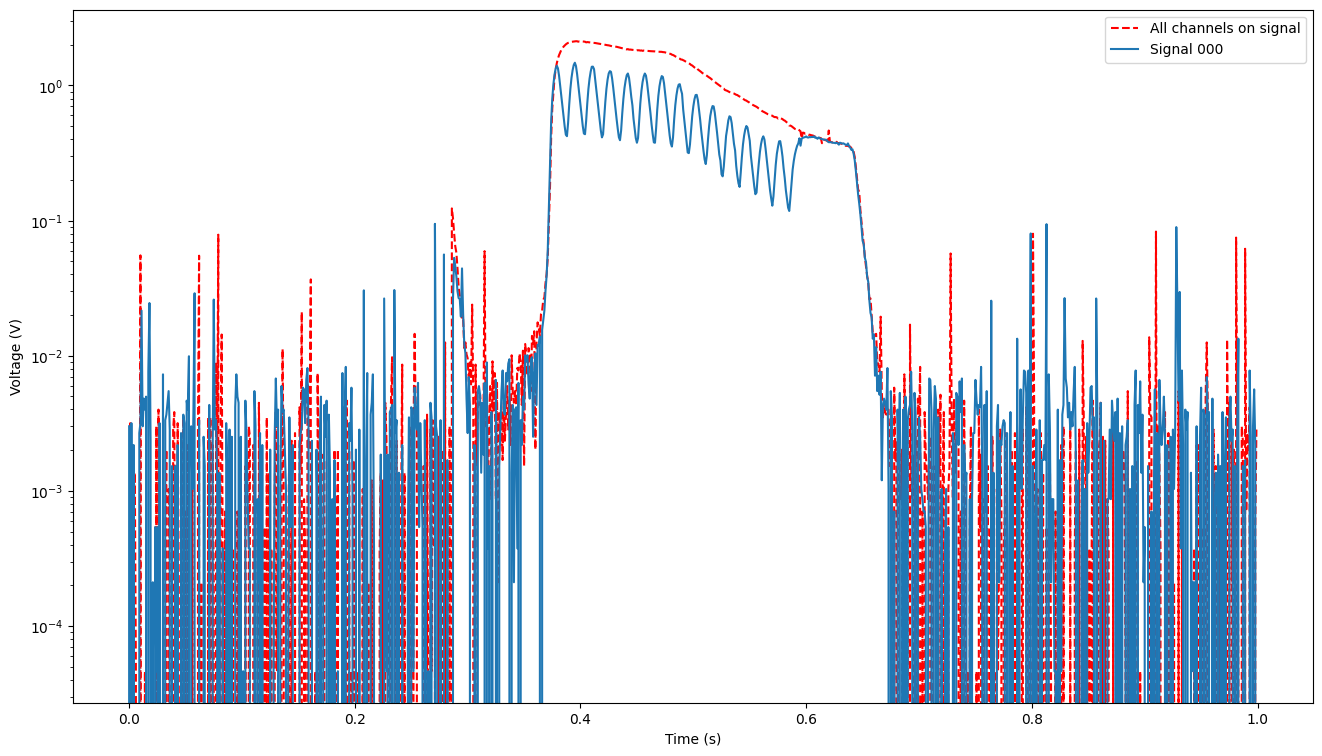

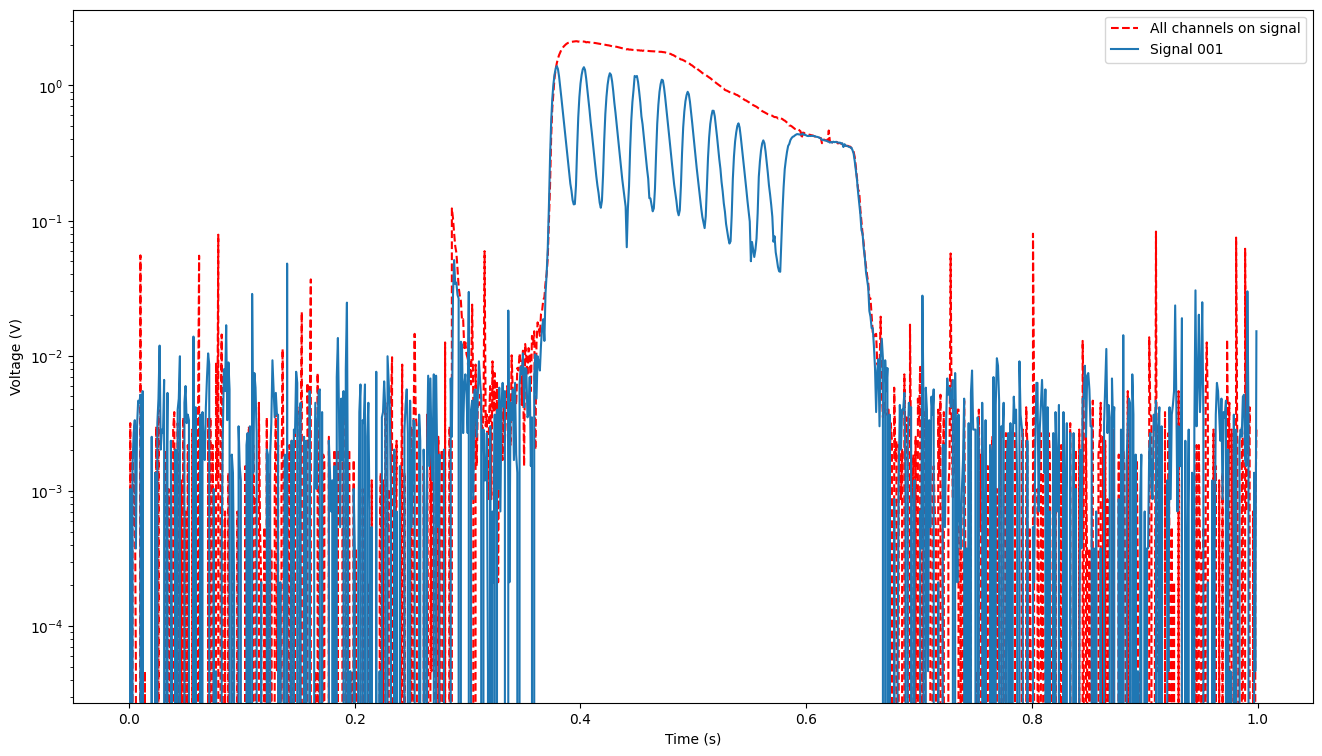

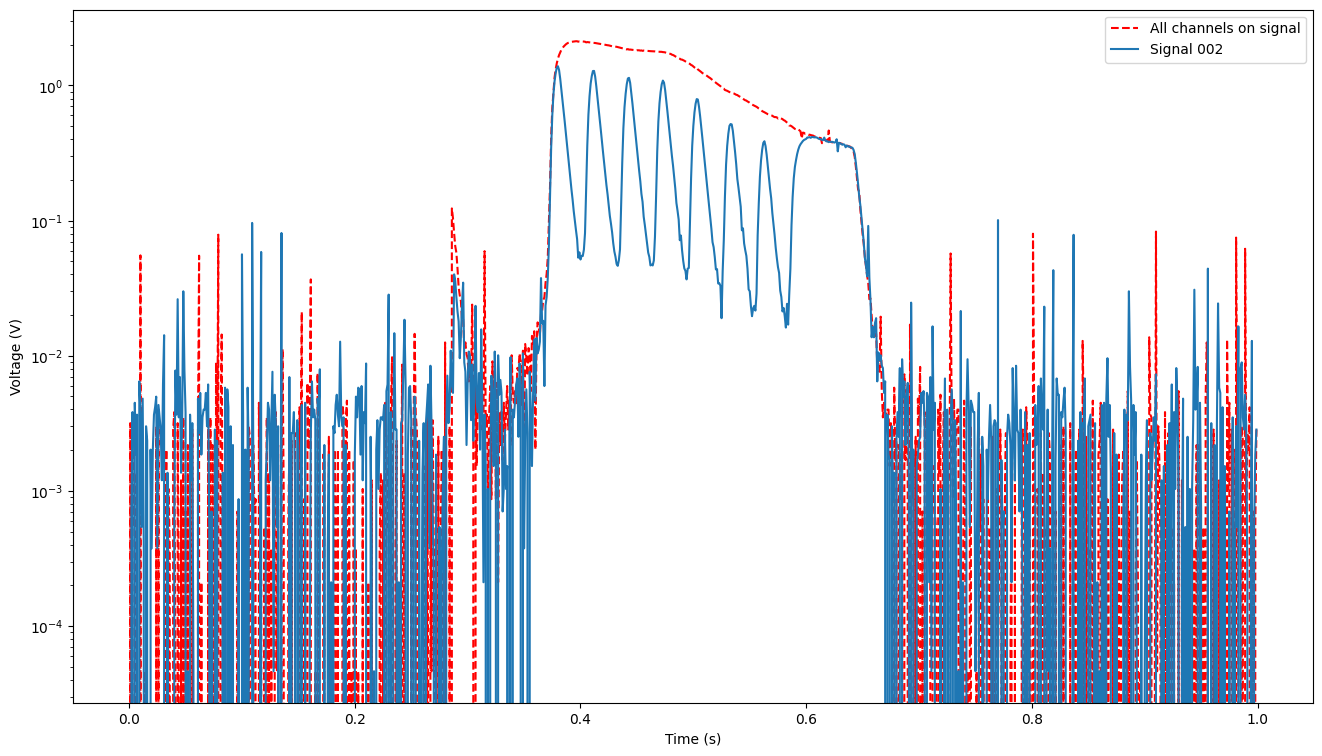

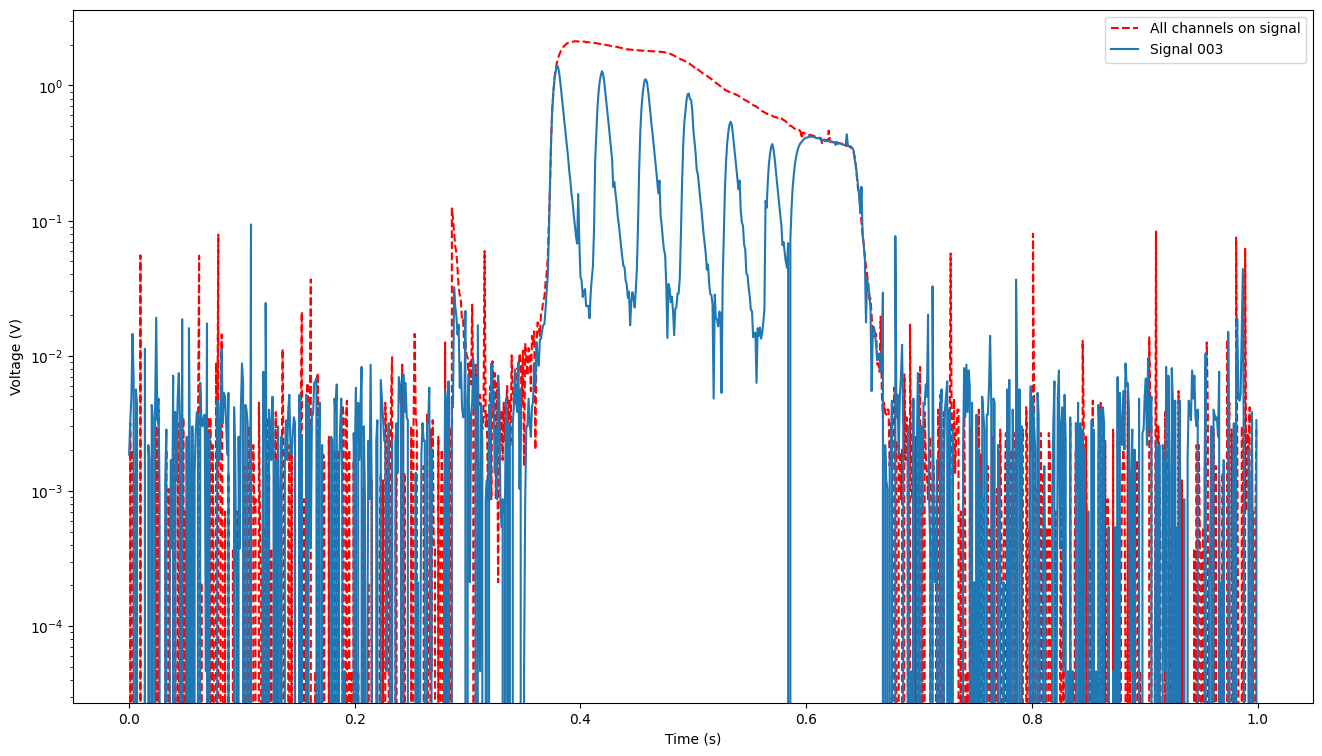

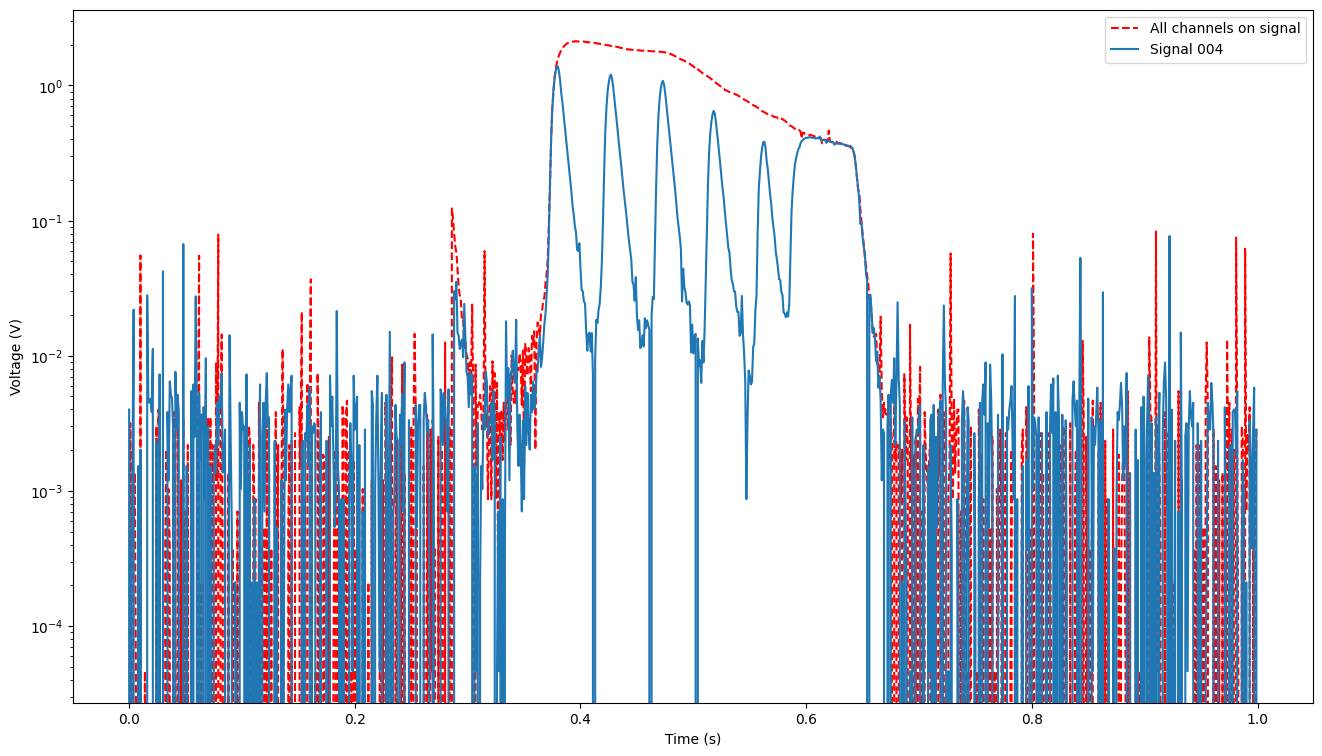

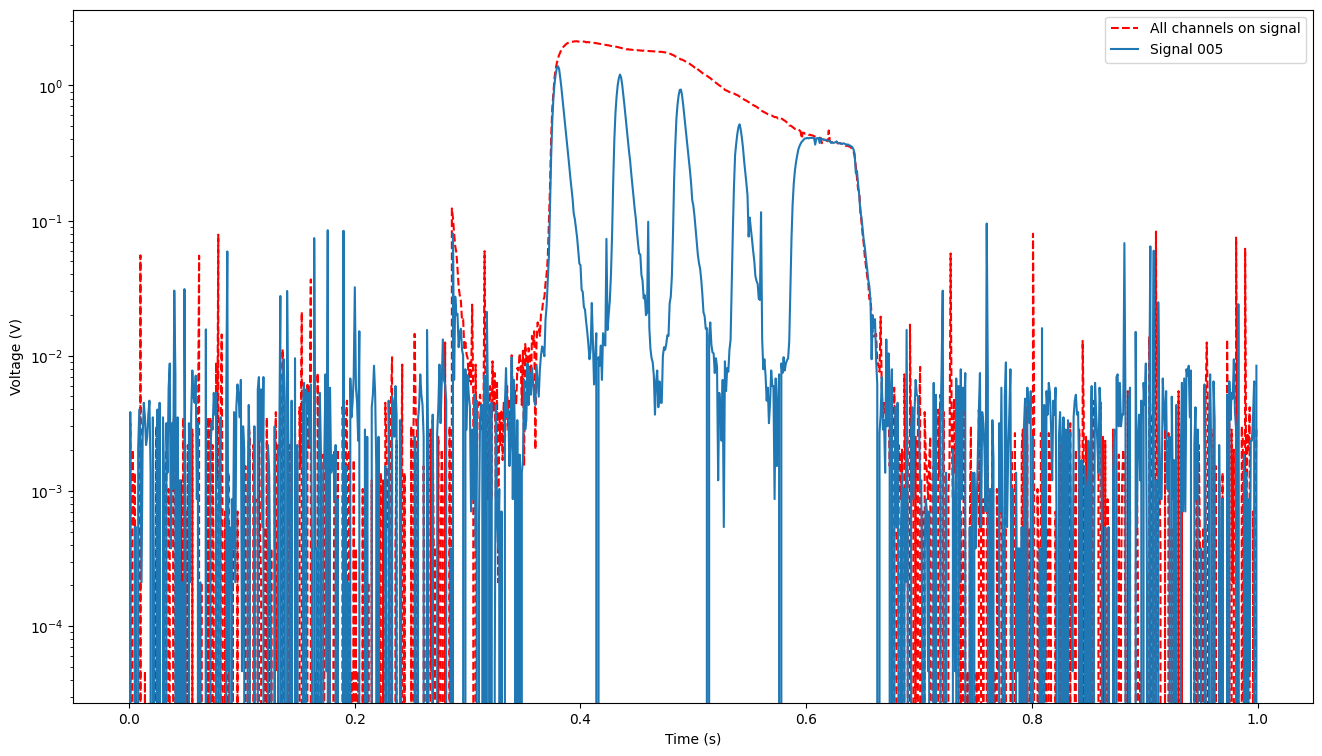

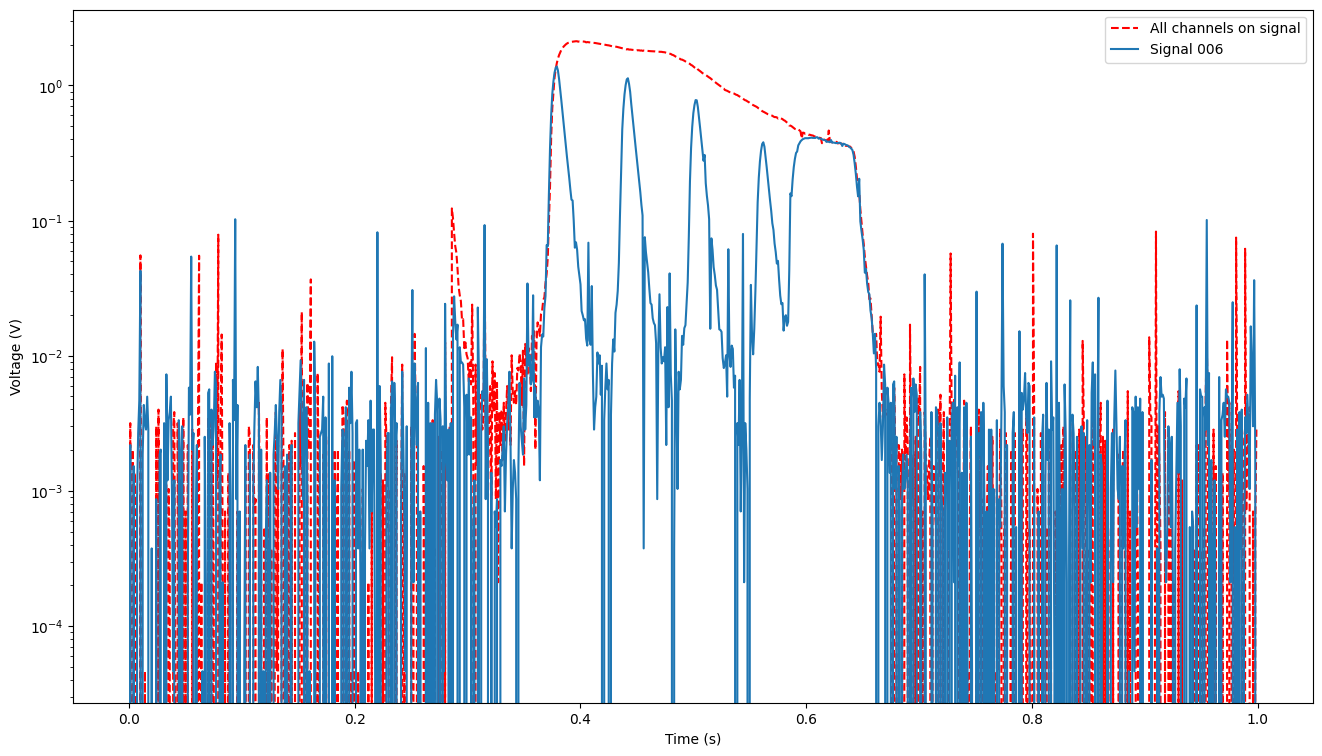

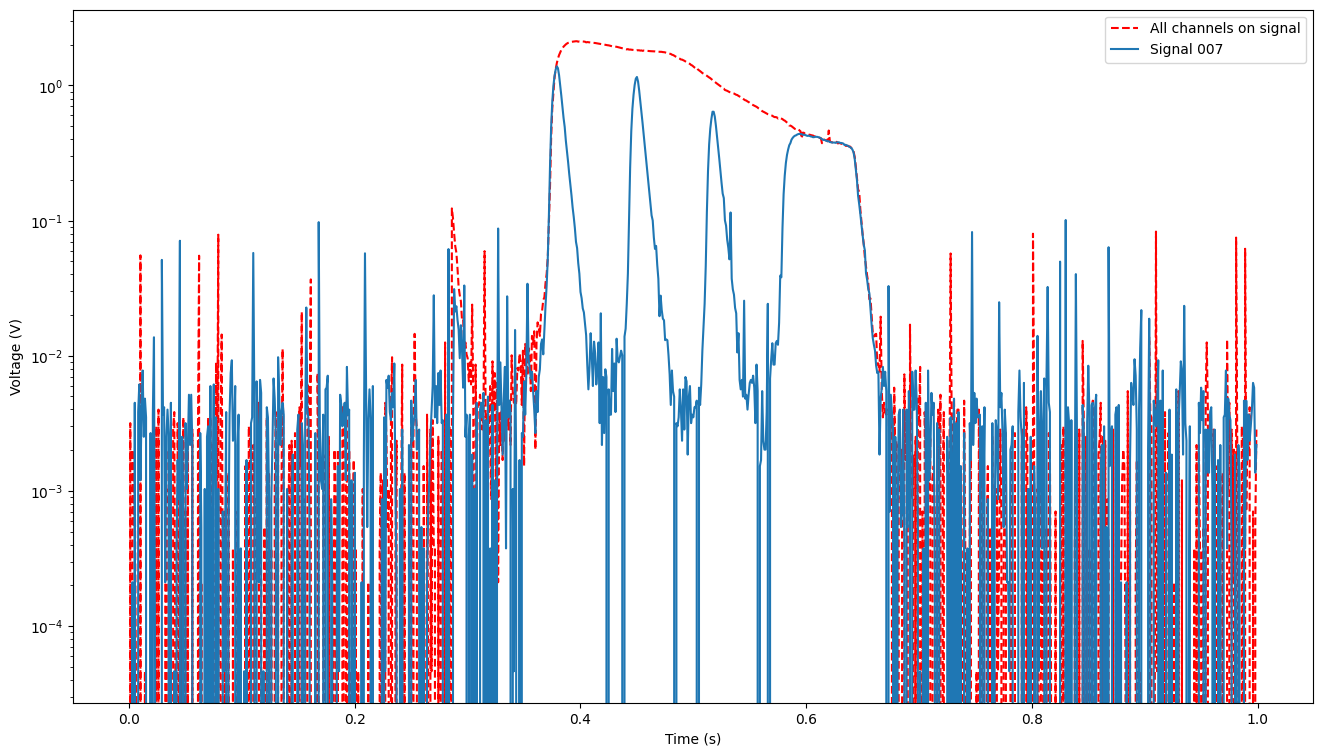

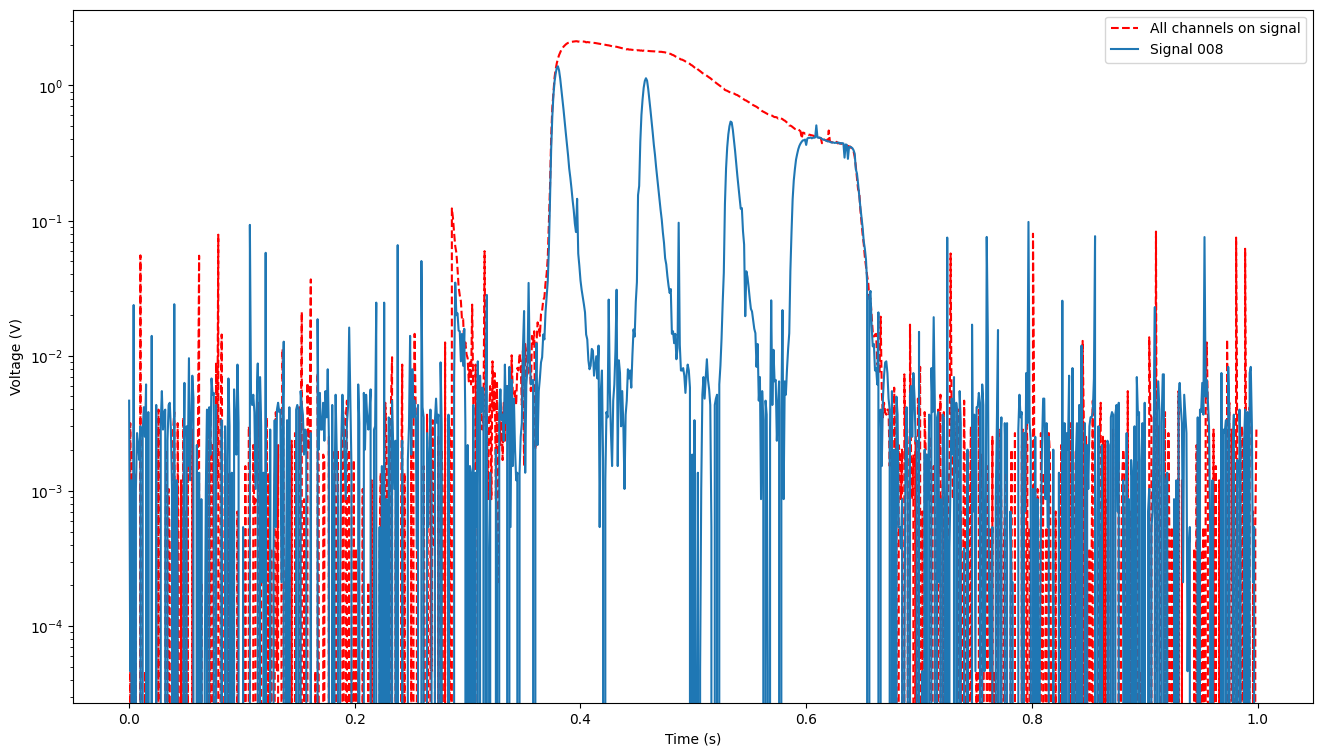

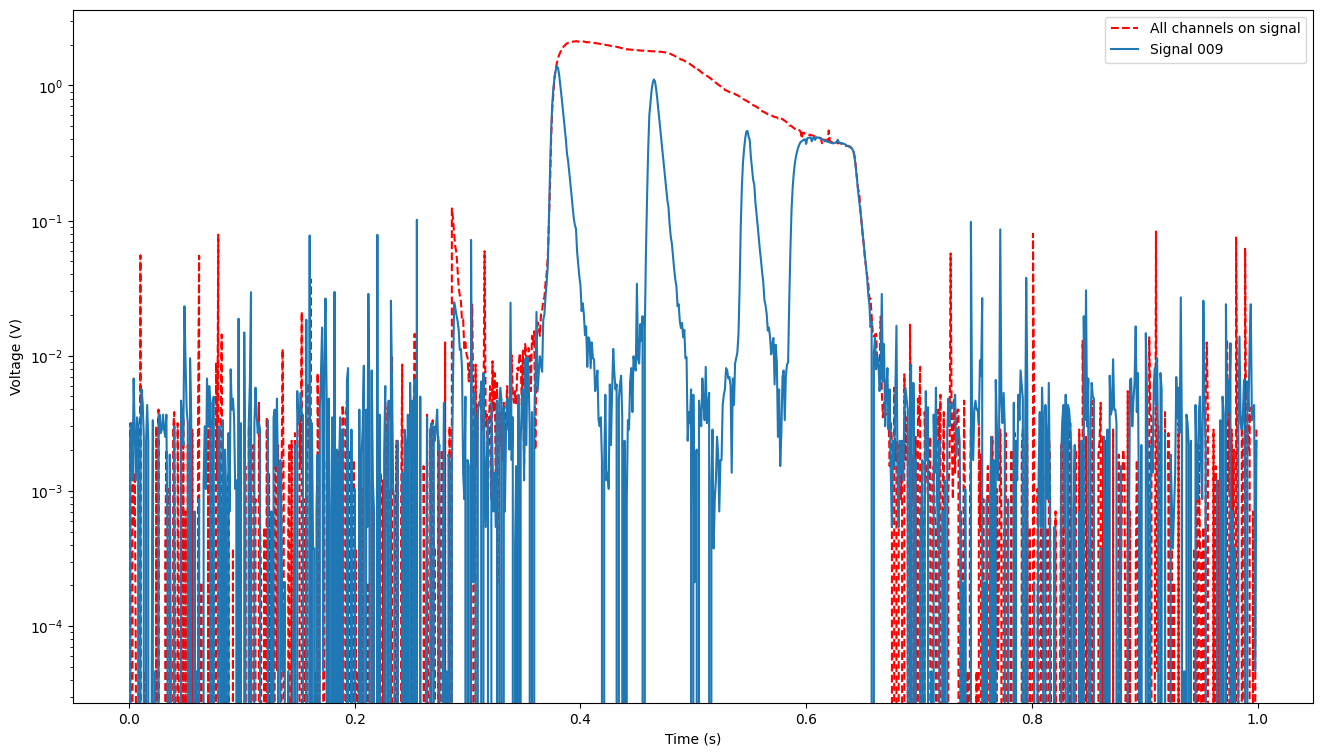

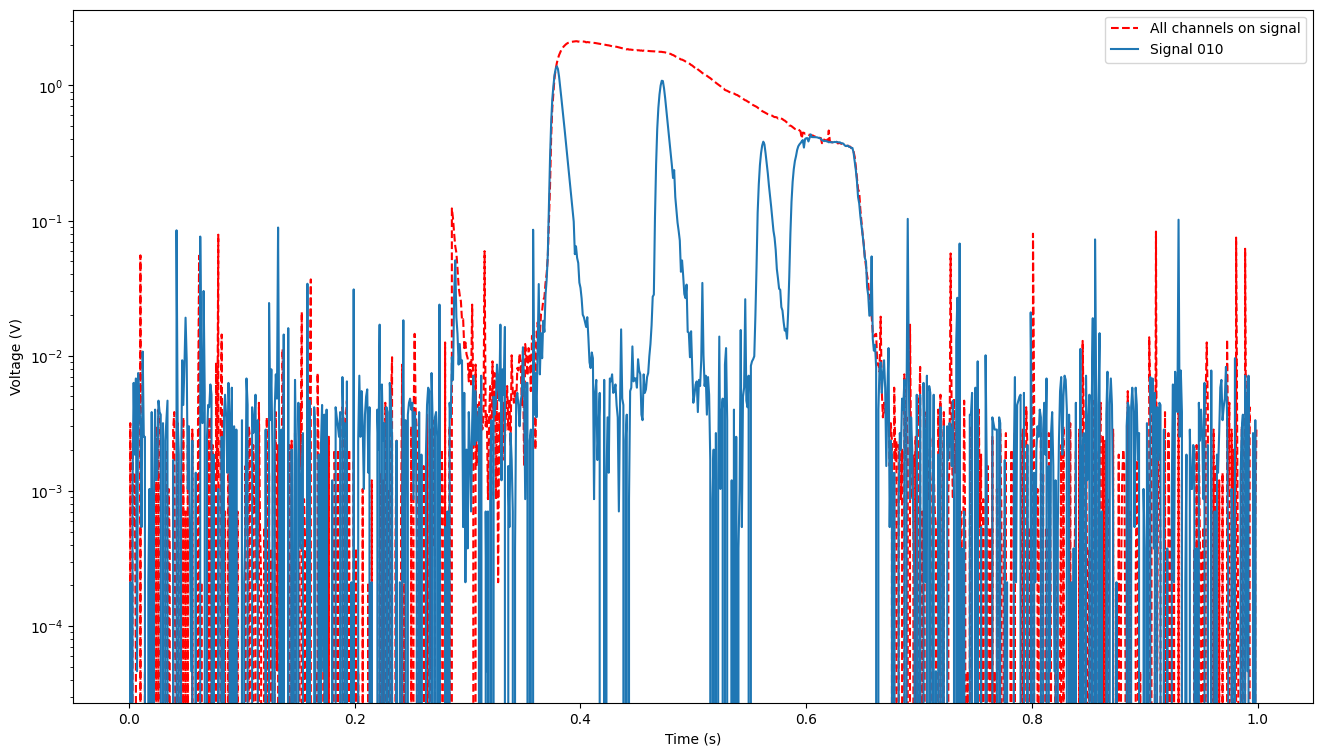

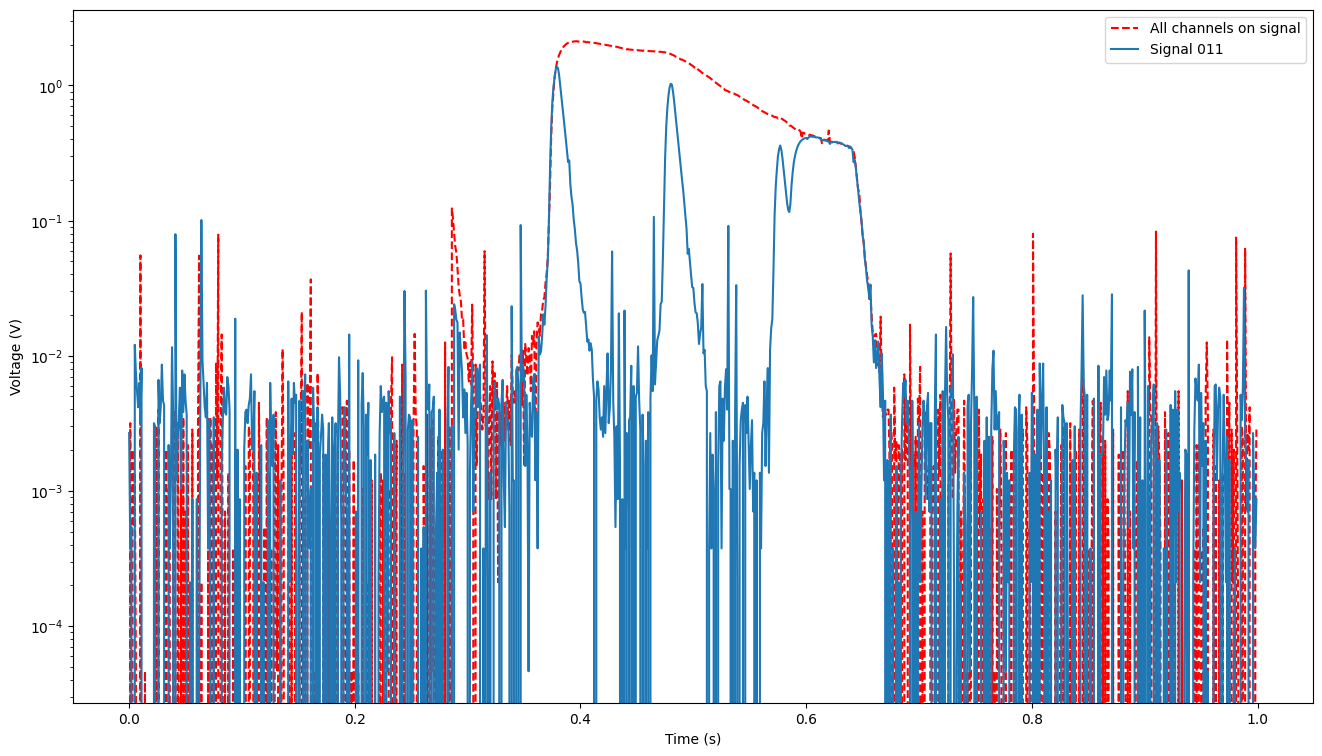

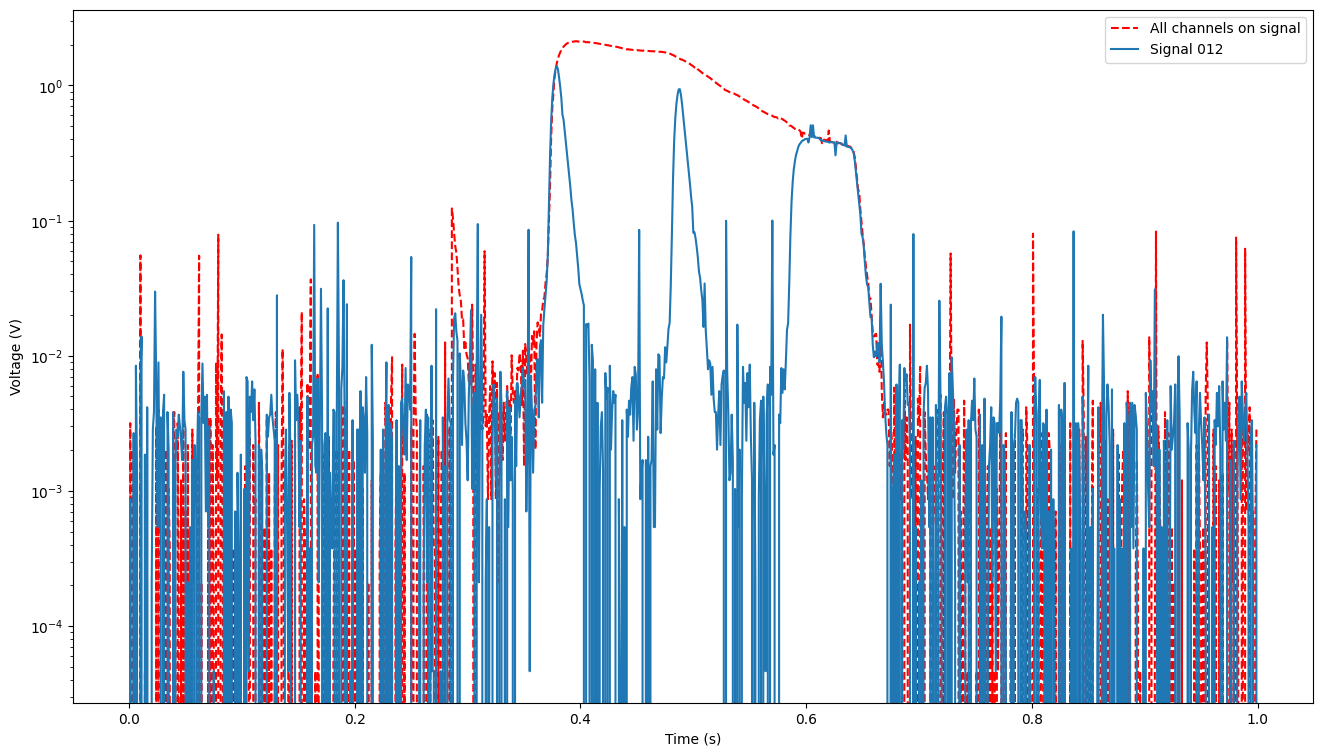

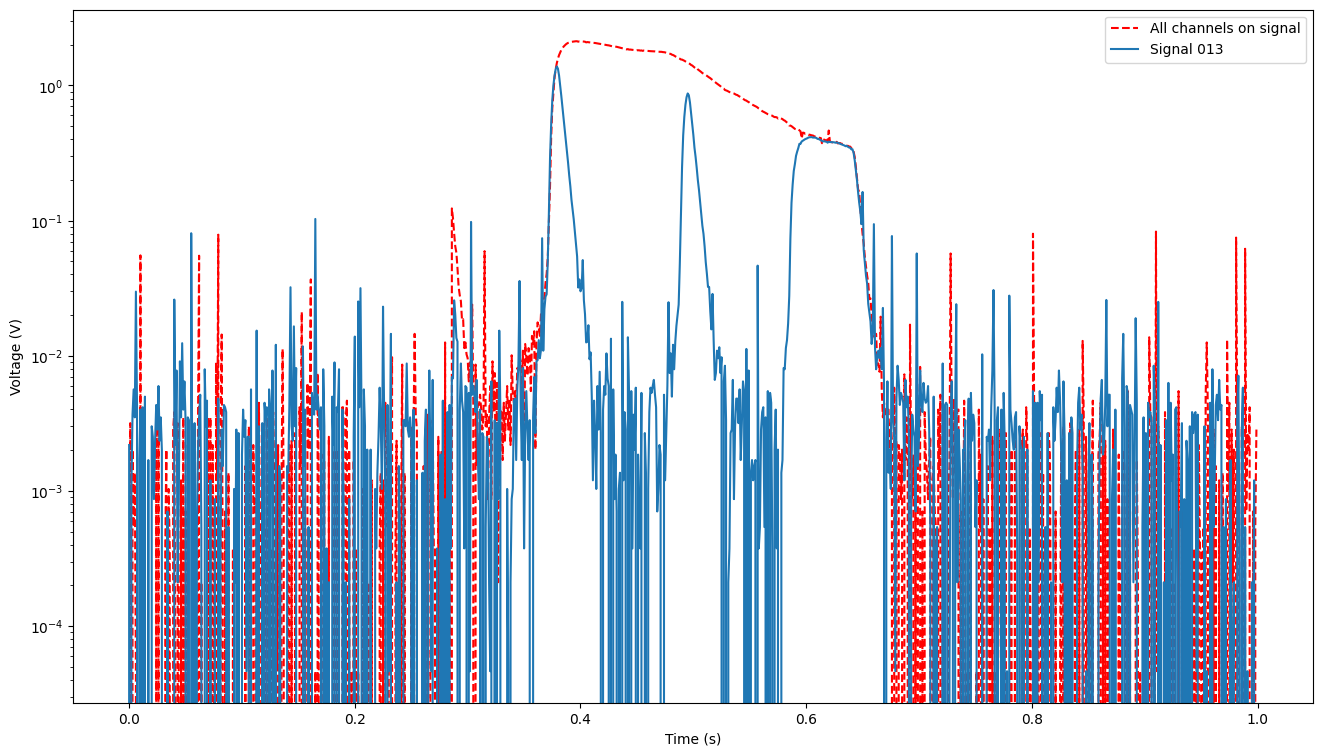

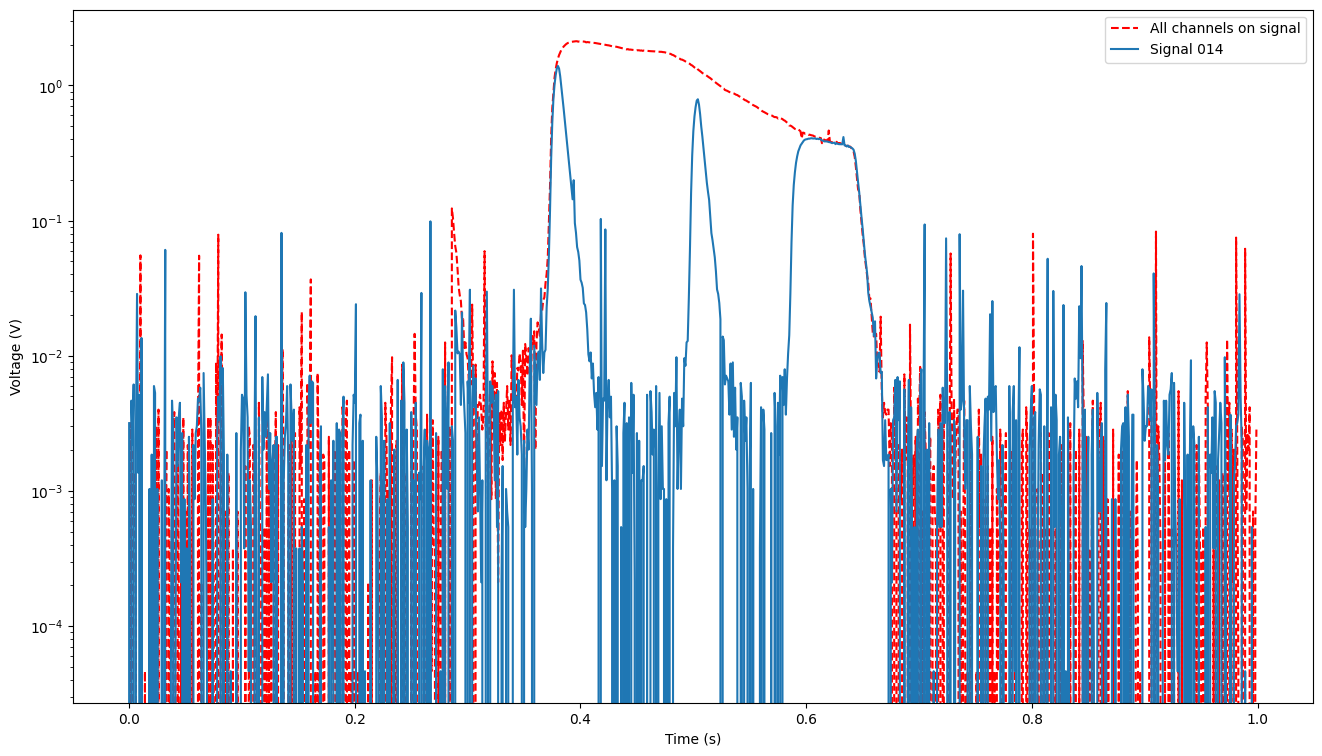

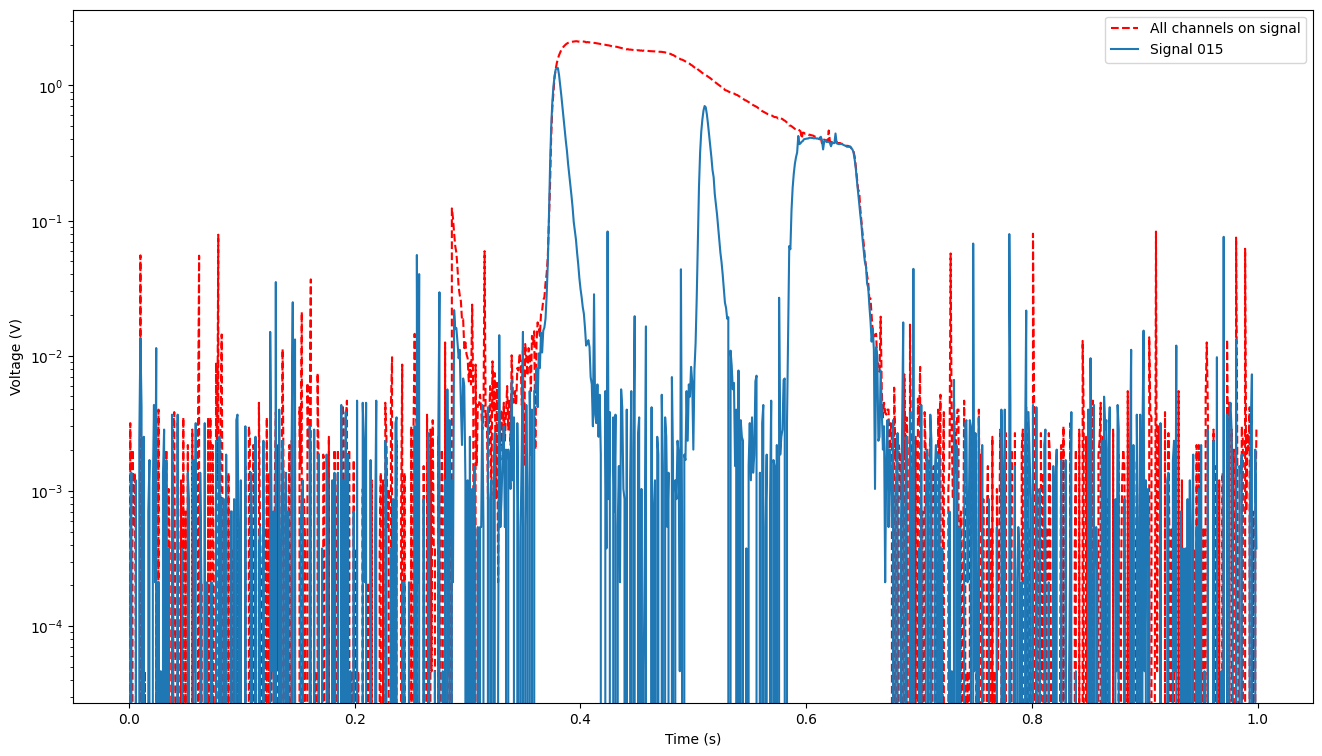

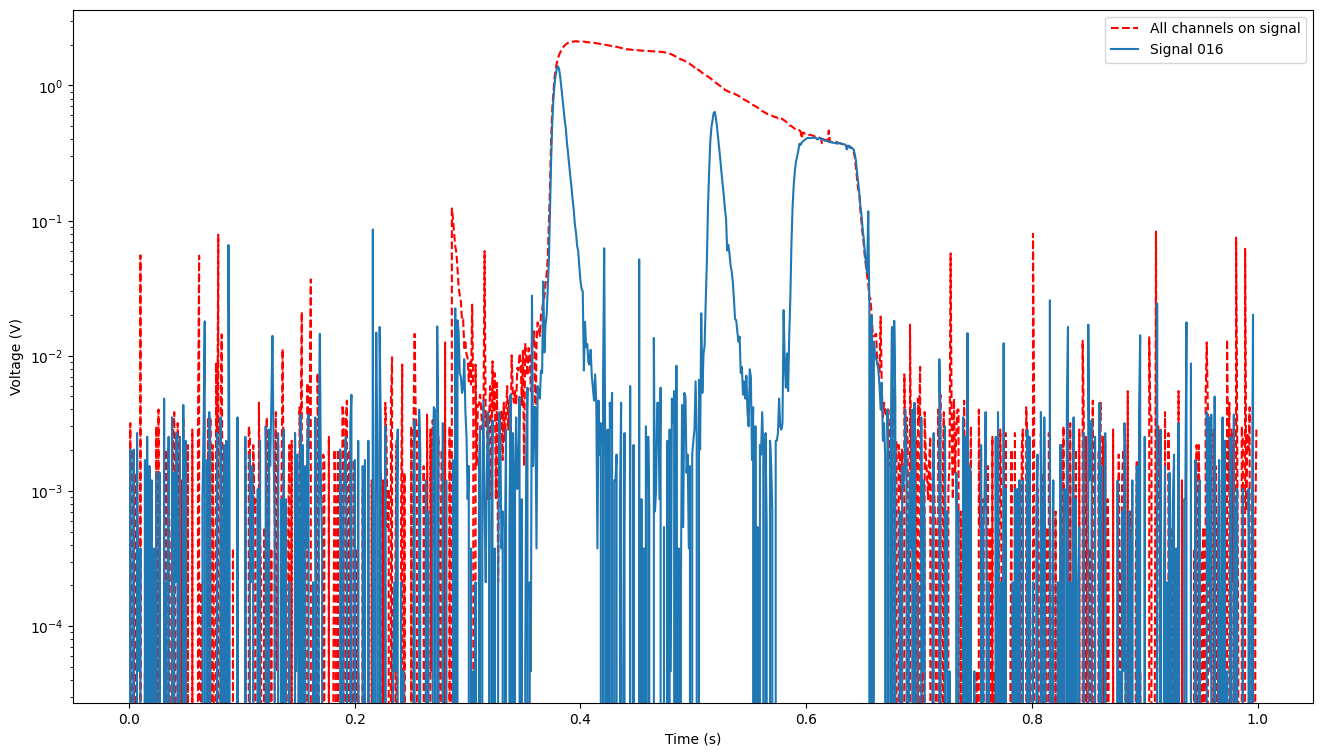

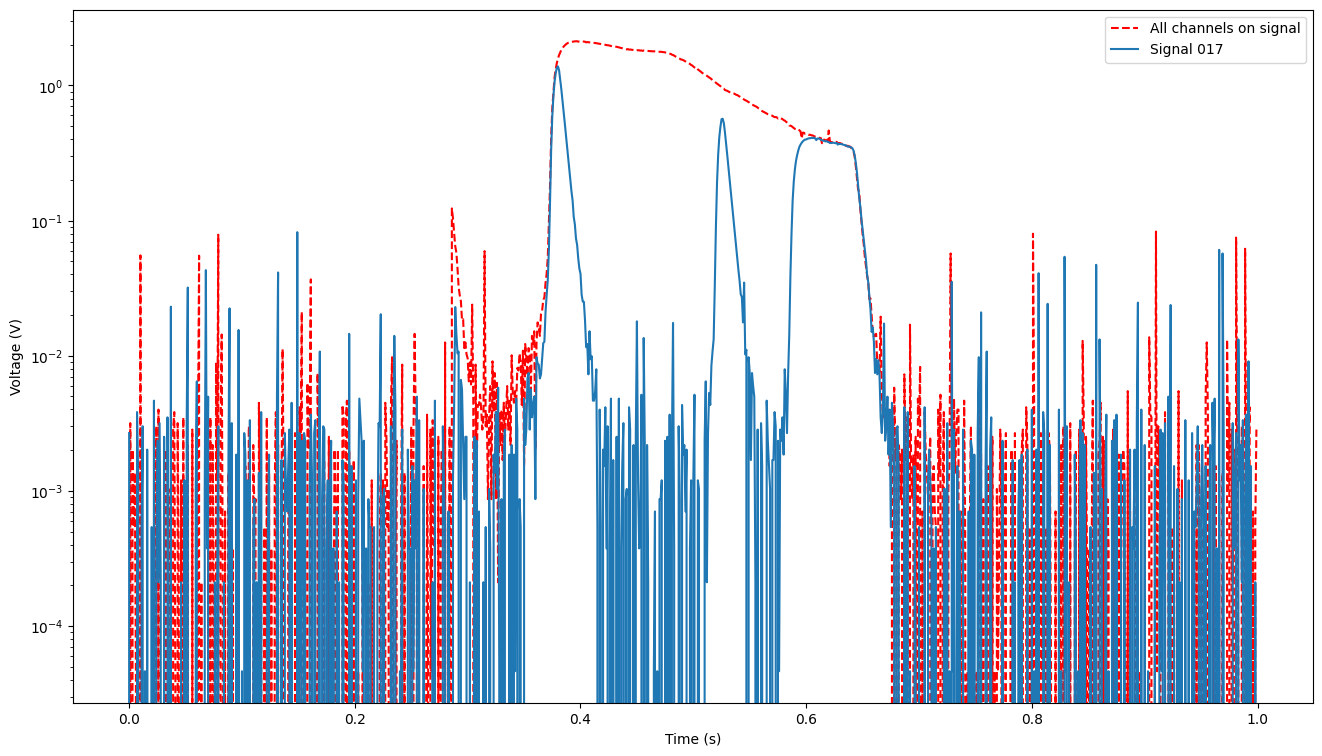

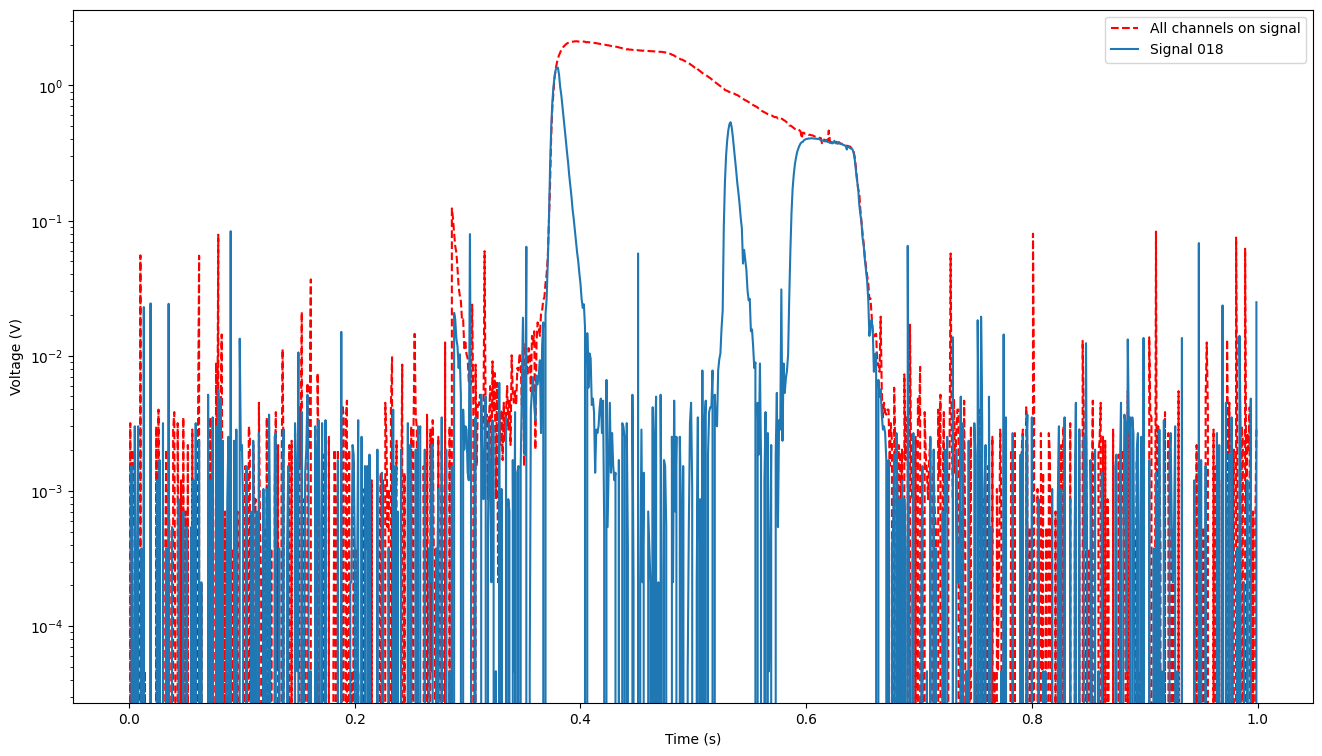

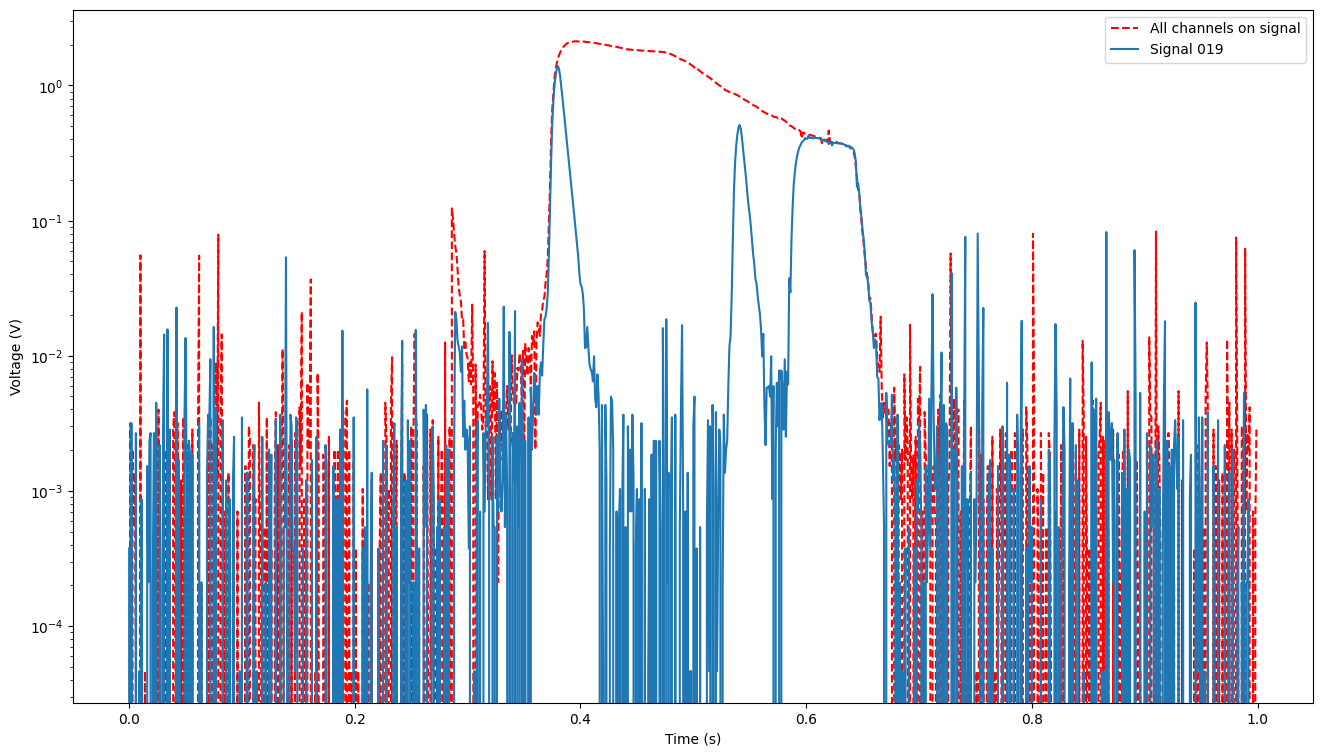

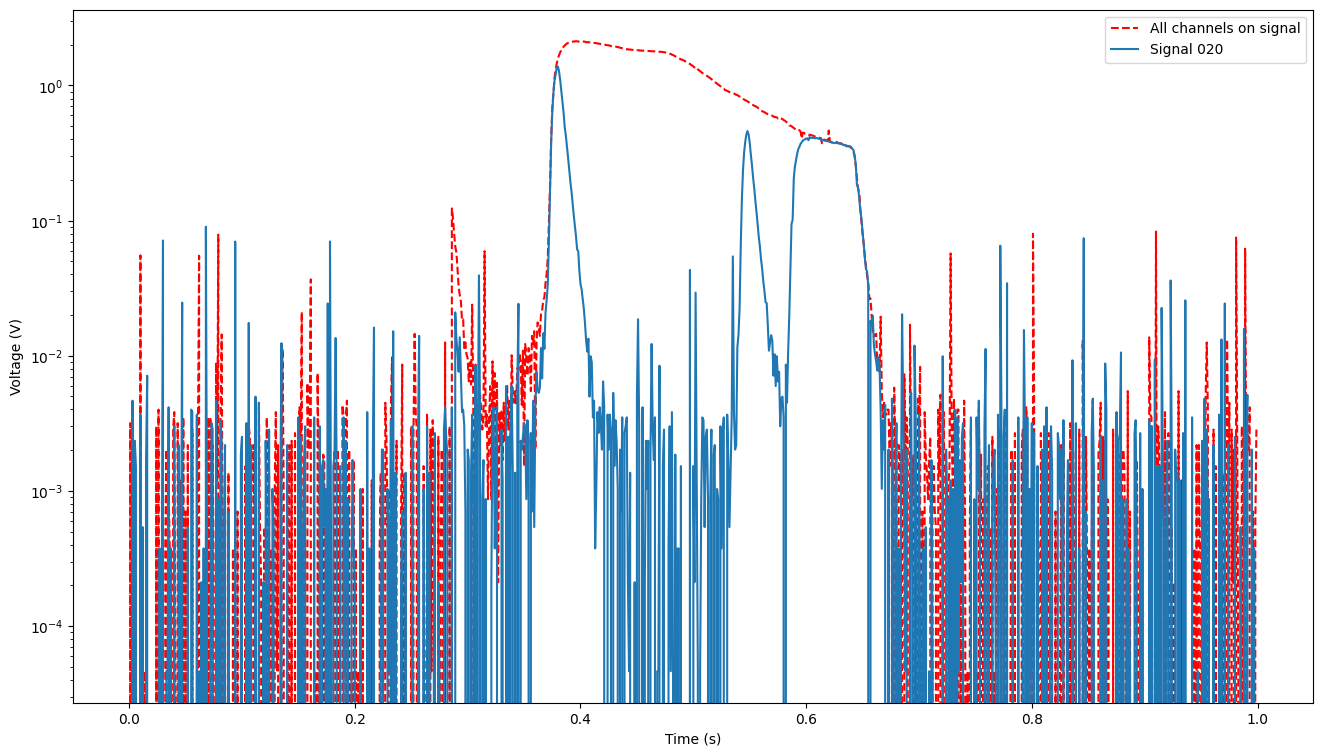

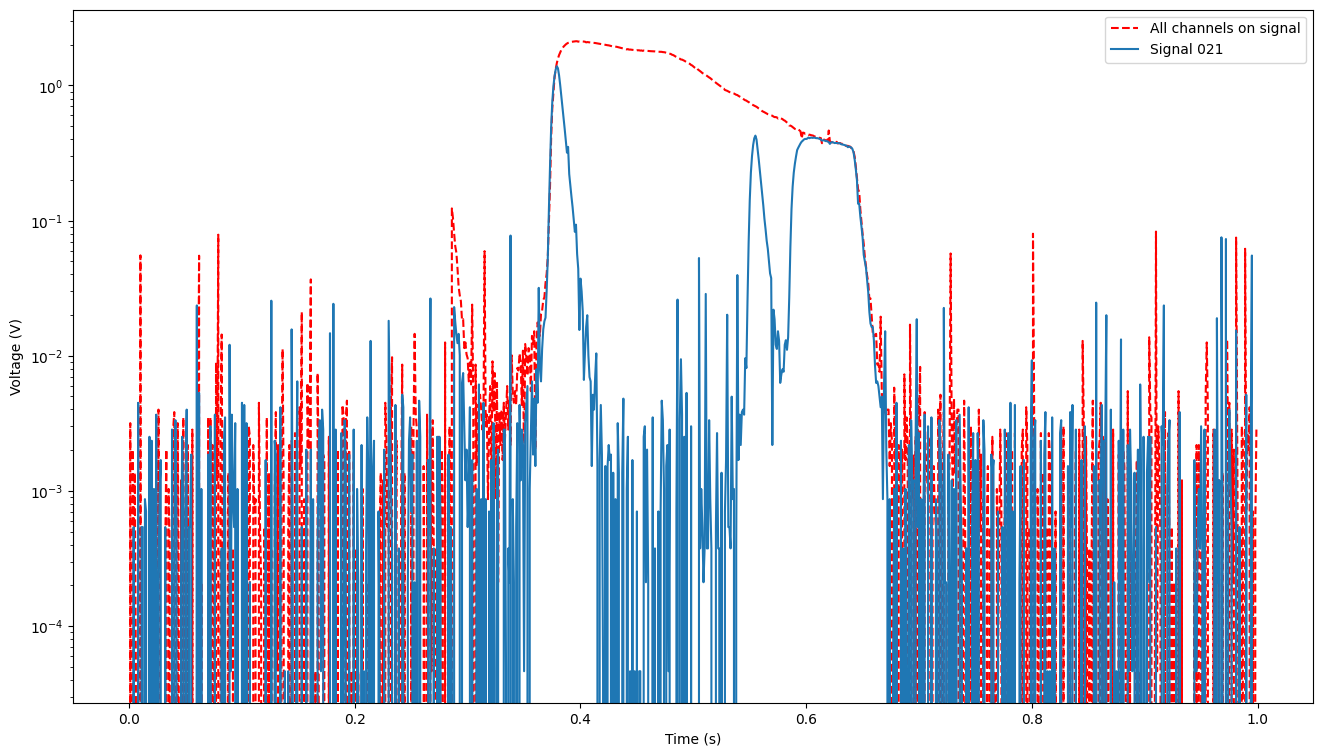

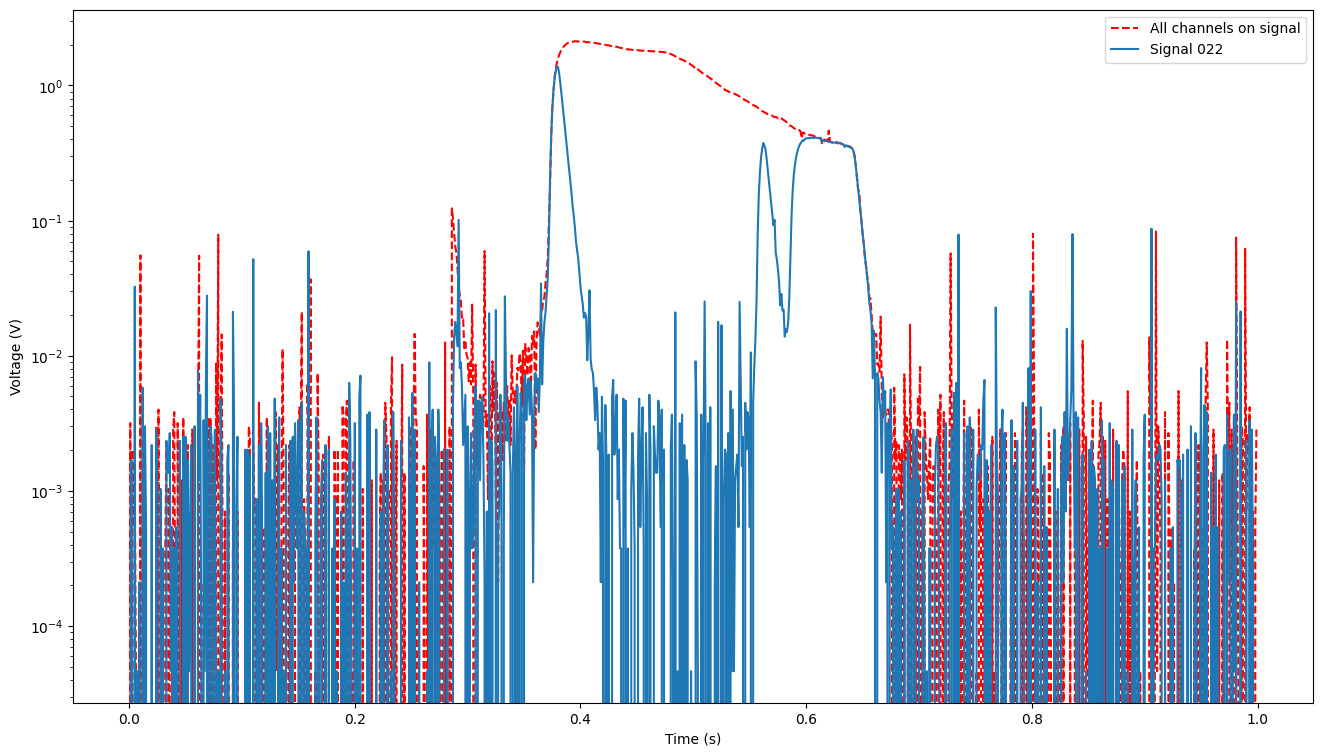

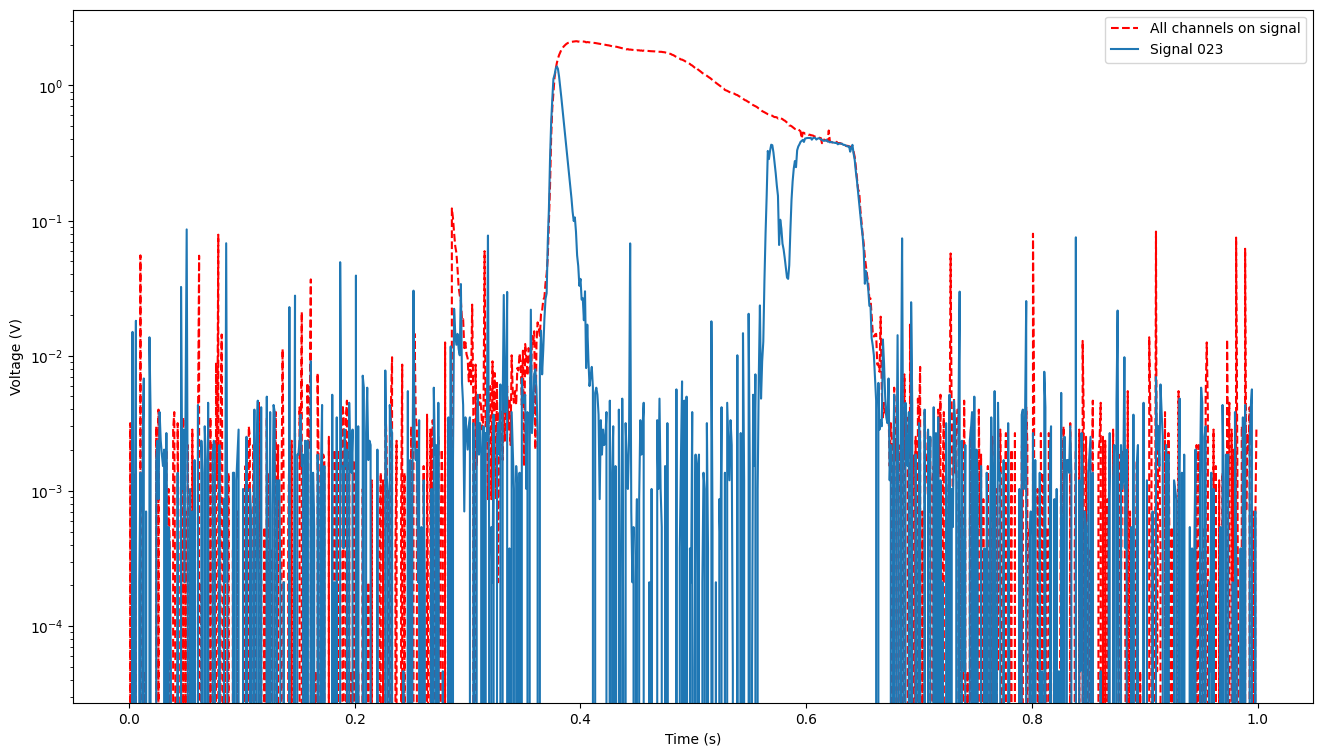

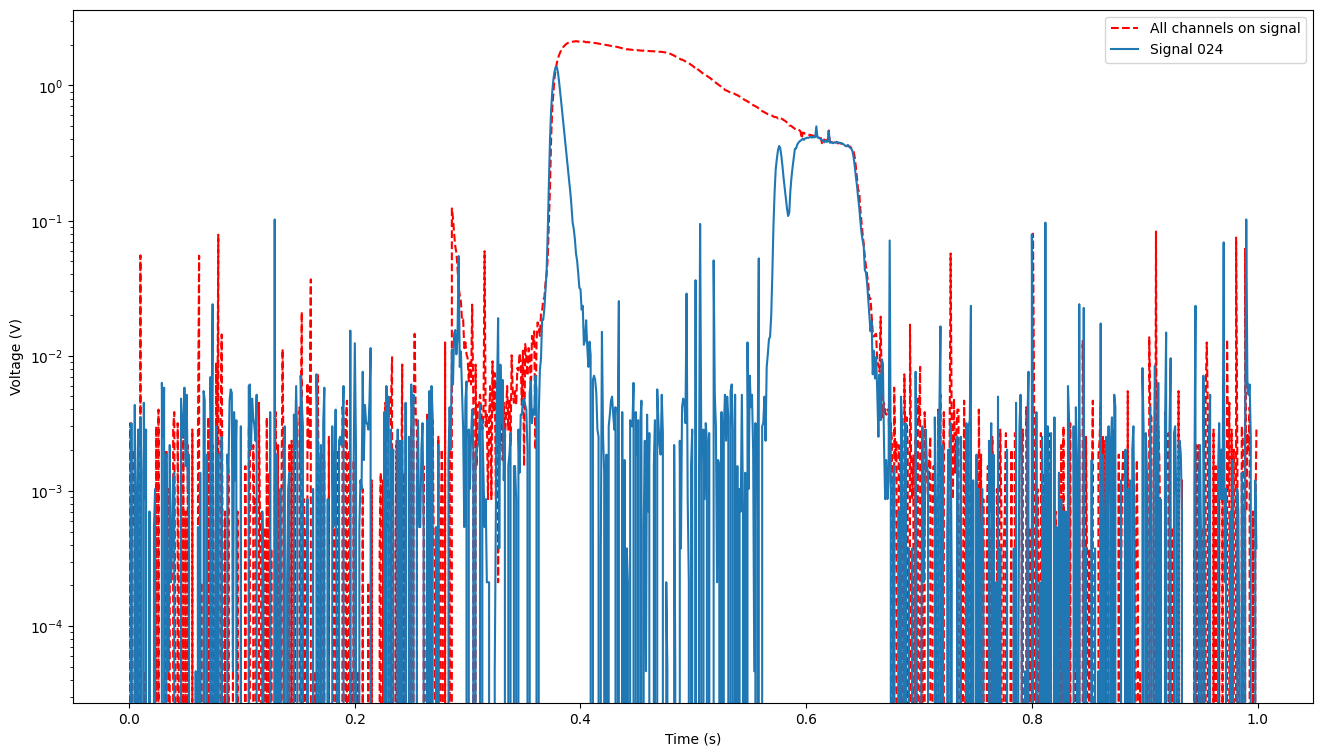

In [4]:
for i in range(0, 25):
    # import the data from the text file
    t, signal = np.loadtxt(f'Data/every_k/reading_{i:03}.txt', delimiter=',', skiprows=1).T
    # fix data by only taking first second of it (as it is periodic with 1s), total data is 2s long so half it
    t = t[:len(t)//2]
    signal = signal[:len(signal)//2]
    
    # fix the signal so it is in the center
    # do this by matching the on signal window with the signal
    # but must roll by the marker_81 value to make sure we index properly
    fixed_signal = np.roll(get_match_window(t, signal, marker_window), marker_81)

    # PLOTTING
    fig, ax = plt.subplots(
        1, 1,
        figsize=(16, 9)
    )

    # Plot the fixed signal with the on signal
    ax.plot(t, signal_on, label=f'All channels on signal', color='r', ls='--', zorder=0)
    ax.plot(t, fixed_signal, label=f'Signal {i:03}', zorder=1)
    ax.legend()
    
    ax.set_yscale('log')
    
    ax.set_ylabel('Voltage (V)')
    ax.set_xlabel('Time (s)')

If we want to create a `.gif` of these fixed signals, we can do as follows (convert cell to code, but convert back to Raw NBConvert when done):

In [ ]:
# import the on data from the text file
t_on, signal_on = np.loadtxt(f'Data/on_channels/reading_000.txt', delimiter=',', skiprows=1).T
# fix data by only taking first second of it (as it is periodic with 1s), total data is 2s long so half it
t_on = t_on[:len(t_on)//2]
signal_on = signal_on[:len(signal_on)//2]

# the markers to use
marker_81 = 600
marker_87 = 660
# create an array of only this window of the on signal
marker_window = signal_on[marker_81:marker_87]

# PLOTTING
fig, ax = plt.subplots(
    1, 1,
    figsize=(16, 9)
)

# Plot the fixed signal with the on signal
ax.plot(t_on, signal_on, label=f'All channels on signal', color='r', ls='--', zorder=0)
ax.plot(t_on[marker_81:marker_87], marker_window, label=f'Marker window', color='b', zorder=1)
ax.legend()

ax.set_ylabel('Voltage (V)')
ax.set_xlabel('Time (s)')